In [1]:
import os
import pandas as pd

# Get the current working directory
current_dir = os.getcwd()

# List all files in the current directory with a .xlsx extension
files_in_dir = [f for f in os.listdir(current_dir) if f.endswith('.xlsx')]

if len(files_in_dir) == 0:
    print("Error: No Excel files found in the current directory.")
else:
    # Use the first Excel file found
    file_path = os.path.join(current_dir, files_in_dir[0])

    df = pd.read_excel(file_path)
    display(df)  # Display the entire dataset


,Transaction Date,Time,Cost,Balance,Transaction,Receipt
0,17.01.2024,12:03,-184.50,15377.27,134 SIMIT SARAYI SABANCI,160013
1,16.01.2024,22:56,-68.00,15561.77,064 EKMOT GIDA ANONIM SI,787078
2,16.01.2024,18:40,-74.00,15629.77,046 STARBUCKS İST SABANC,131636
3,16.01.2024,03:00,-0.02,15703.77,YDS TWITCH,472183
4,16.01.2024,03:00,-10.33,15703.79,YDS TWITCH,472183
...,...,...,...,...,...,...
555,08.12.2022,14:11,-110.00,709.95,067 KOPUKLU KAHVE,152568
556,07.12.2022,17:57,-18.00,819.95,067 KOPUKLU KAHVE,296303
557,07.12.2022,16:48,-77.50,837.95,012 KUCUK EV SABANCI,168526
558,07.12.2022,13:42,-65.00,915.45,032 YUKSELEN YILDIZ TURI,921512


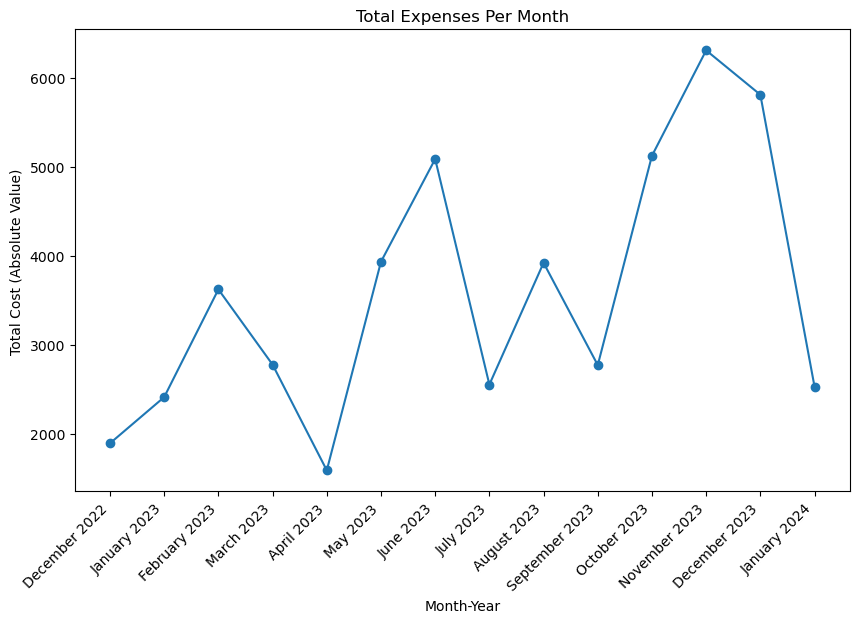

In [2]:
import matplotlib.pyplot as plt
from calendar import month_name

# Get the current working directory
current_dir = os.getcwd()

# List all files in the current directory with a .xlsx extension
files_in_dir = [f for f in os.listdir(current_dir) if f.endswith('.xlsx')]

if len(files_in_dir) == 0:
    print("Error: No Excel files found in the current directory.")
else:
    # Use the first Excel file found
    file_path = os.path.join(current_dir, files_in_dir[0])

    # Read the Excel file
    df = pd.read_excel(file_path)

    # Make a copy of the DataFrame
    df_copy = df.copy()

    # Convert 'Transaction Date' column to datetime format with specified format
    df_copy['Transaction Date'] = pd.to_datetime(df_copy['Transaction Date'], format='%d.%m.%Y')

    # Create new columns for month and year
    df_copy['month'] = df_copy['Transaction Date'].dt.month
    df_copy['year'] = df_copy['Transaction Date'].dt.year

    # Group by month and year, calculate total cost
    monthly_expenses = df_copy.groupby(['year', 'month'])['Cost'].sum().reset_index()

    # Map numerical months to verbal representations
    monthly_expenses['month'] = monthly_expenses['month'].map(dict(enumerate(month_name)))

    # Make cost numbers positive
    monthly_expenses['Cost'] = monthly_expenses['Cost'].abs()

    # Plot yearly graph
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expenses['month']+ ' ' + monthly_expenses['year'].astype(str), monthly_expenses['Cost'], marker='o')
    plt.title('Total Expenses Per Month')
    plt.xlabel('Month-Year')
    plt.ylabel('Total Cost (Absolute Value)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [3]:

# Get the current working directory
current_dir = os.getcwd()

# List all files in the current directory with a .xlsx extension
files_in_dir = [f for f in os.listdir(current_dir) if f.endswith('.xlsx')]

if len(files_in_dir) == 0:
    print("Error: No Excel files found in the current directory.")
else:
    # Use the first Excel file found
    file_path = os.path.join(current_dir, files_in_dir[0])

    # Read the Excel file
    df = pd.read_excel(file_path)

    # Make a copy of the DataFrame
    df_copy = df.copy()

    # Convert 'Transaction Date' column to datetime format
    df_copy['Transaction Date'] = pd.to_datetime(df_copy['Transaction Date'], format='%d.%m.%Y')
    # Function to categorize dates into semesters
    def categorize_semester(date):
        if pd.Timestamp('2023-10-02') <= date <= pd.Timestamp('2024-01-19'):
            return 'Fall 2023-2024'
        elif pd.Timestamp('2023-07-10') <= date <= pd.Timestamp('2023-08-29'):
                return 'Summer 2022-2023'
        elif pd.Timestamp('2023-02-10') <= date <= pd.Timestamp('2023-06-11'):
                return 'Spring 2022-2023'
        elif df_copy['Transaction Date'].min() <= date <= pd.Timestamp('2023-01-20'):
                return 'Fall 2022-2023'
        else:
                return 'Vacation'
 
    # Apply the function to create a new column 'Semester Name'
    df_copy['Semester Name'] = df_copy['Transaction Date'].apply(categorize_semester)

    # Display the modified DataFrame
    display(df_copy)


,Transaction Date,Time,Cost,Balance,Transaction,Receipt,Semester Name
0,2024-01-17,12:03,-184.50,15377.27,134 SIMIT SARAYI SABANCI,160013,Fall 2023-2024
1,2024-01-16,22:56,-68.00,15561.77,064 EKMOT GIDA ANONIM SI,787078,Fall 2023-2024
2,2024-01-16,18:40,-74.00,15629.77,046 STARBUCKS İST SABANC,131636,Fall 2023-2024
3,2024-01-16,03:00,-0.02,15703.77,YDS TWITCH,472183,Fall 2023-2024
4,2024-01-16,03:00,-10.33,15703.79,YDS TWITCH,472183,Fall 2023-2024
...,...,...,...,...,...,...,...
555,2022-12-08,14:11,-110.00,709.95,067 KOPUKLU KAHVE,152568,Fall 2022-2023
556,2022-12-07,17:57,-18.00,819.95,067 KOPUKLU KAHVE,296303,Fall 2022-2023
557,2022-12-07,16:48,-77.50,837.95,012 KUCUK EV SABANCI,168526,Fall 2022-2023
558,2022-12-07,13:42,-65.00,915.45,032 YUKSELEN YILDIZ TURI,921512,Fall 2022-2023


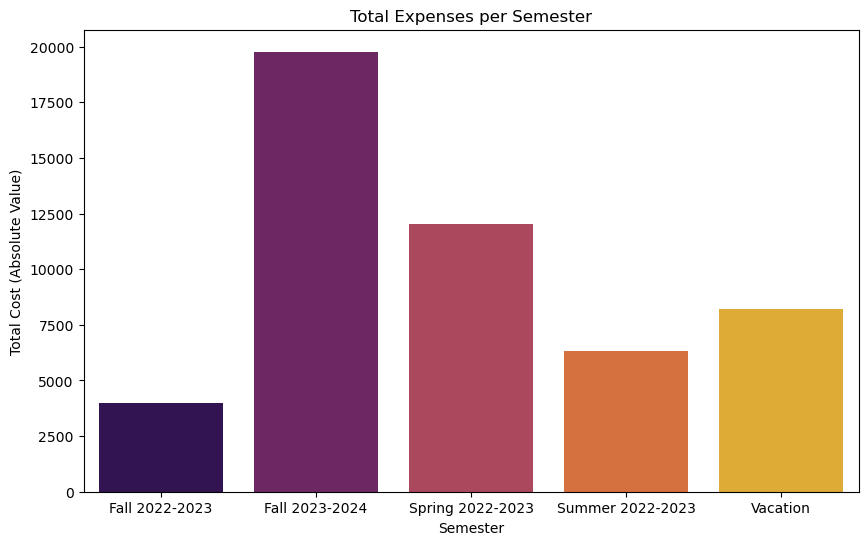

Note that Spring 2022-2023 semester was online due to catastrophic earthquake in Hatay, hence expenses at that semester is made only in final exam period.
Given that this dataset starts at 07/12/2022, Fall 2022-2023 data only consists of the transaction made in approx. 1.5 months.
Days that are not included in semester time interval are considered as vacation.


In [4]:
import seaborn as sns   

# Group by semester and calculate total cost
semesterly_expenses = df_copy.groupby('Semester Name')['Cost'].sum().reset_index()

# Make costs positive
semesterly_expenses['Cost'] = semesterly_expenses['Cost'].abs()

# Plot a heatmap with inferno colormap
plt.figure(figsize=(10, 6))
sns.barplot(x='Semester Name', y='Cost', data=semesterly_expenses, hue='Semester Name', palette='inferno', legend=False)
plt.title('Total Expenses per Semester')
plt.xlabel('Semester')
plt.ylabel('Total Cost (Absolute Value)')
plt.show()
print("Note that Spring 2022-2023 semester was online due to catastrophic earthquake in Hatay, hence expenses at that semester is made only in final exam period.")
print("Given that this dataset starts at 07/12/2022, Fall 2022-2023 data only consists of the transaction made in approx. 1.5 months.")
print("Days that are not included in semester time interval are considered as vacation.")


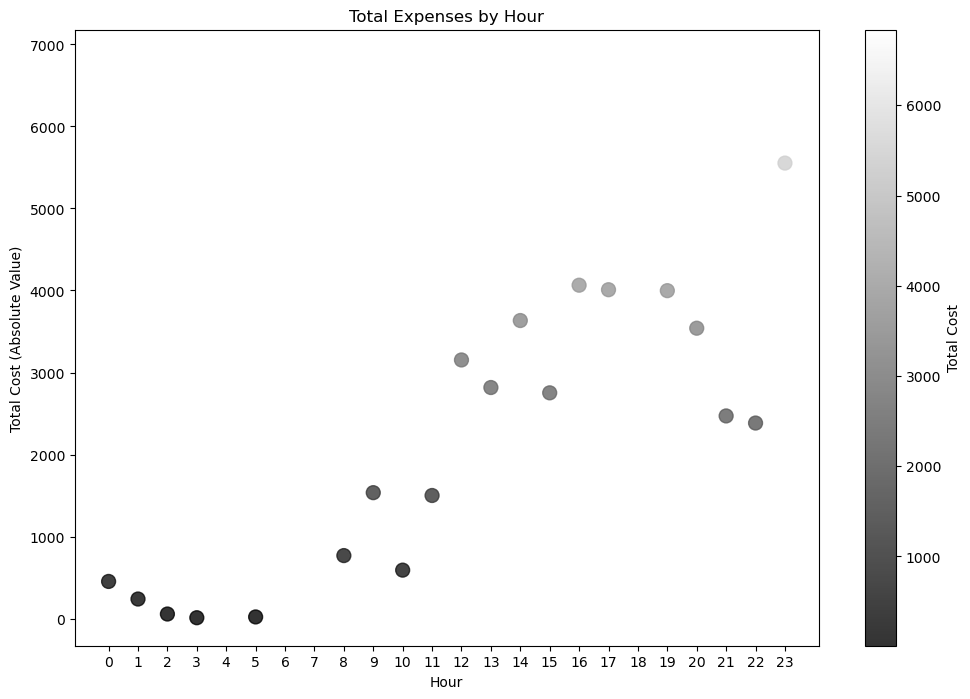

In [5]:
# Convert 'Time' to datetime
df_copy['Time'] = pd.to_datetime(df_copy['Time'], format='%H:%M')

# Extract hour
df_copy['Hour'] = df_copy['Time'].dt.hour

# Group by hour and sum the absolute 'Cost'
hourly_expenses = df_copy.groupby('Hour')['Cost'].agg(lambda x: x.abs().sum()).reset_index()

# Create a scatter plot with 'gray' colormap
plt.figure(figsize=(12, 8))
plt.scatter(hourly_expenses['Hour'], hourly_expenses['Cost'], s=100, c=hourly_expenses['Cost'], cmap='gray', alpha=0.8)  # Adjusted alpha value
plt.title('Total Expenses by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Cost (Absolute Value)')
plt.xticks(range(24))  # Set x-axis ticks from 0 to 23
plt.colorbar(label='Total Cost')
plt.show()


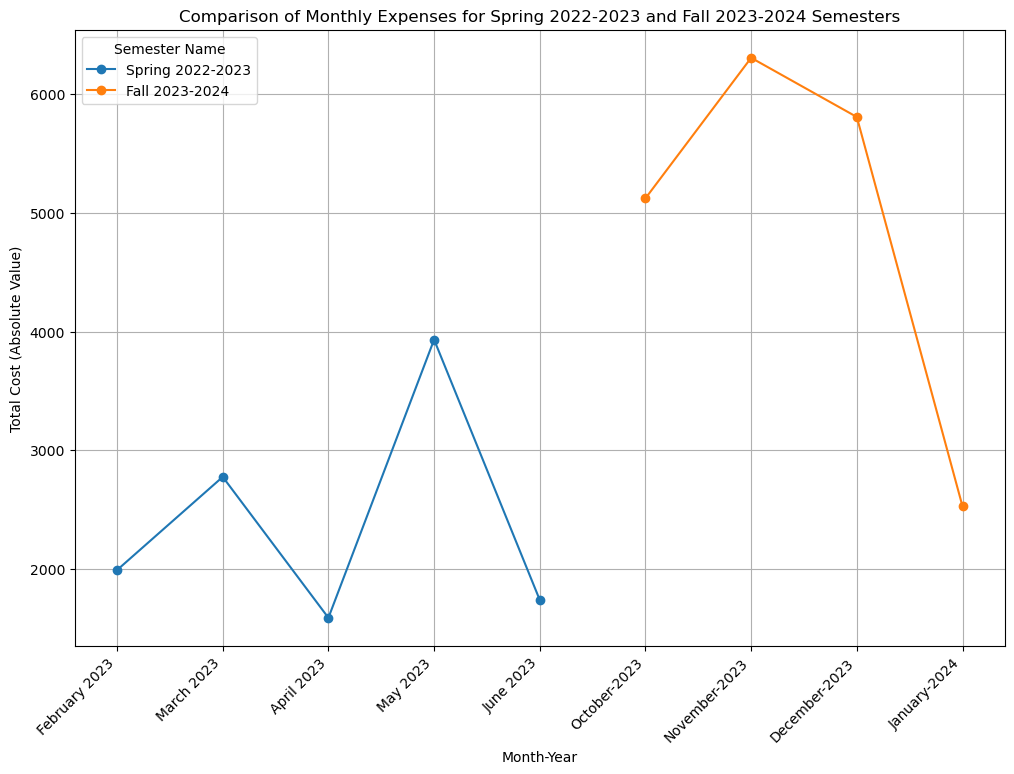

May 2023 is an outlier as 2 domestic, 1 international, in total, 3 travels were made whilst ongoing online semester. Hence, expenses throughout that month has a significant increase than its counterparts.
Compared to other terms, fewer classes were taken in Spring 2022-2023; hence, fewer finals have been attended. Therefore, June 2023 is less than some of its counterparts.


In [6]:

# Get the current working directory
current_dir = os.getcwd()

# List all files in the current directory with a .xlsx extension
files_in_dir = [f for f in os.listdir(current_dir) if f.endswith('.xlsx')]

if len(files_in_dir) == 0:
    print("Error: No Excel files found in the current directory.")
else:
    # Use the first Excel file found
    file_path = os.path.join(current_dir, files_in_dir[0])

    # Read the Excel file
    df = pd.read_excel(file_path)

    # Make a copy of the DataFrame
    df_copy = df.copy()

    # Convert 'Transaction Date' column to datetime format with specified format
    df_copy['Transaction Date'] = pd.to_datetime(df_copy['Transaction Date'], format='%d.%m.%Y')

    # Apply the function to create a new column 'Semester Name'
    df_copy['Semester Name'] = df_copy['Transaction Date'].apply(categorize_semester)

    # Create new columns for month, year, and semester
    df_copy['month'] = df_copy['Transaction Date'].dt.month
    df_copy['year'] = df_copy['Transaction Date'].dt.year

    # Group by semester, month, and year, calculate total cost
    semesterly_expenses = df_copy.groupby(['Semester Name', 'year', 'month'])['Cost'].sum().reset_index()

    # Filter data for Spring 2022-2023 and Fall 2023-2024 semesters
    spring_expenses = semesterly_expenses[semesterly_expenses['Semester Name'] == 'Spring 2022-2023'].copy()
    fall_expenses = semesterly_expenses[semesterly_expenses['Semester Name'] == 'Fall 2023-2024'].copy()

    # Map numerical months to verbal representations
    spring_expenses['month'] = spring_expenses['month'].map(dict(enumerate(month_name)))
    fall_expenses['month'] = fall_expenses['month'].map(dict(enumerate(month_name)))

    # Make cost numbers positive
    spring_expenses['Cost'] = spring_expenses['Cost'].abs()
    fall_expenses['Cost'] = fall_expenses['Cost'].abs()

    # Define a custom sort order for months
    custom_month_order = ['February', 'March', 'April', 'May', 'June', 'October', 'November', 'December', 'January']

    # Convert the 'month' column to categorical with the custom sort order
    spring_expenses['month'] = pd.Categorical(spring_expenses['month'], categories=custom_month_order, ordered=True)
    fall_expenses['month'] = pd.Categorical(fall_expenses['month'], categories=custom_month_order, ordered=True)

    # Sort the DataFrames by year and month for plotting
    spring_expenses = spring_expenses.sort_values(by=['year', 'month'])
    fall_expenses = fall_expenses.sort_values(by=['year', 'month'])

    # Plot a stacked line graph
    plt.figure(figsize=(12, 8))
    plt.plot(spring_expenses['month'].astype(str) + ' ' + spring_expenses['year'].astype(str),
             spring_expenses['Cost'], label='Spring 2022-2023', marker='o')
    plt.plot(fall_expenses['month'].astype(str) + '-' + fall_expenses['year'].astype(str),
             fall_expenses['Cost'], label='Fall 2023-2024', marker='o')

    plt.title('Comparison of Monthly Expenses for Spring 2022-2023 and Fall 2023-2024 Semesters')
    plt.xlabel('Month-Year')
    plt.ylabel('Total Cost (Absolute Value)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Semester Name', loc='upper left')
    plt.grid(True)
    plt.show()

    print("May 2023 is an outlier as 2 domestic, 1 international, in total, 3 travels were made whilst ongoing online semester. Hence, expenses throughout that month has a significant increase than its counterparts.")
    print("Compared to other terms, fewer classes were taken in Spring 2022-2023; hence, fewer finals have been attended. Therefore, June 2023 is less than some of its counterparts.")


Predicted Balance on January 17, 2024: 14078.887800000019
Actual Balance on January 17, 2024: 15377.27


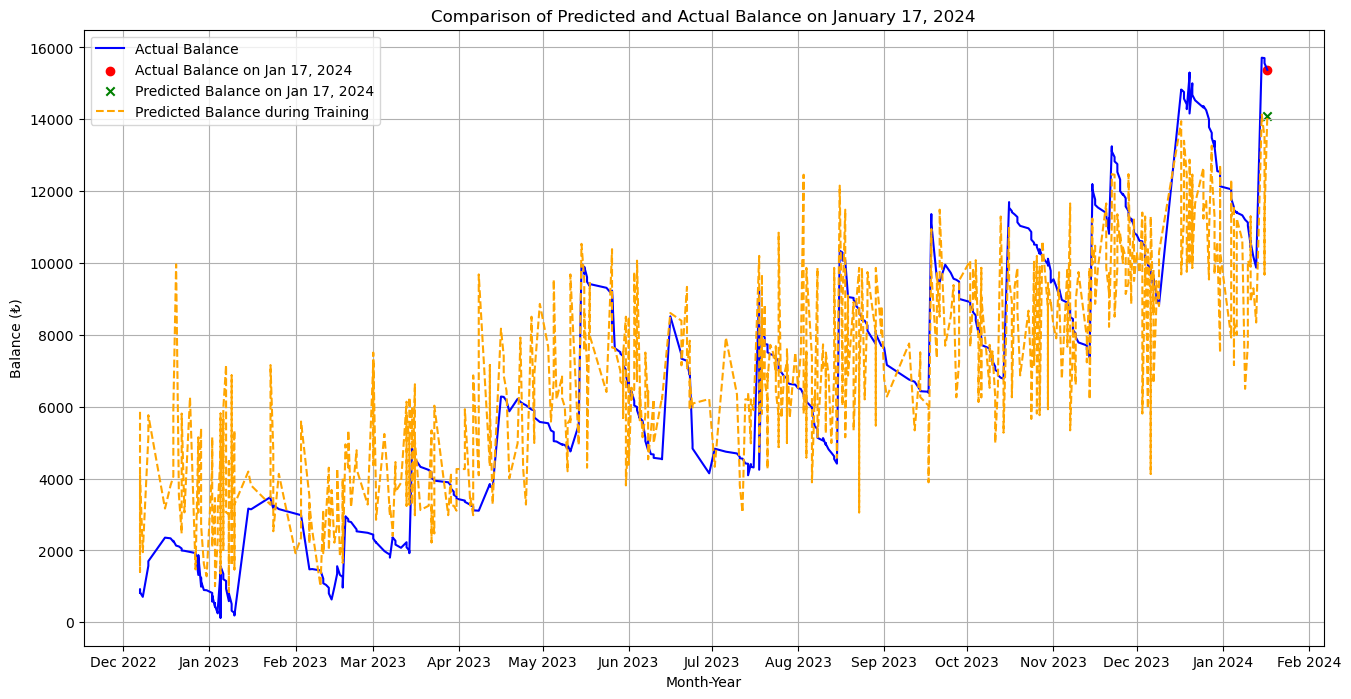

In [7]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib.dates import MonthLocator, DateFormatter

# Assuming your DataFrame is named 'df' and has 'Transaction Date', 'Balance' columns

# Convert 'Transaction Date' to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Transaction Date'
df.sort_values(by='Transaction Date', inplace=True)

# Calculate the change in balance
df['Balance Change'] = df['Balance'].diff()

# Drop rows with NaN values (first row after diff operation)
df = df.dropna()

# Filter data until October 2, 2024
train_data = df[df['Transaction Date'] <= '2024-10-02']

# Separate features (X) and target variable (y)
X_train = train_data[['Balance Change']]
y_train = train_data['Balance']

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the balance on January 17, 2024
prediction_date = pd.to_datetime('2024-01-17')
prediction_data = df[df['Transaction Date'] == prediction_date]
X_pred = prediction_data[['Balance Change']]
predicted_balance = model.predict(X_pred)[0]

# Compare with actual balance values
actual_balance = df[df['Transaction Date'] == prediction_date]['Balance'].values[0]

# Print the predicted and actual balance values
print(f'Predicted Balance on January 17, 2024: {predicted_balance}')
print(f'Actual Balance on January 17, 2024: {actual_balance}')

# Predict the balance for the entire period
df['Predicted Balance'] = model.predict(df[['Balance Change']])

# Plot the comparison with improved aesthetics
plt.figure(figsize=(16, 8))

# Plot the actual balance
plt.plot(df['Transaction Date'], df['Balance'], label='Actual Balance', color='blue')

# Highlight the prediction point on January 17, 2024
plt.scatter(prediction_date, actual_balance, color='red', marker='o', label='Actual Balance on Jan 17, 2024')
plt.scatter(prediction_date, predicted_balance, color='green', marker='x', label='Predicted Balance on Jan 17, 2024')

# Plot the predicted balance during training with a dashed line
plt.plot(df['Transaction Date'], df['Predicted Balance'], label='Predicted Balance during Training', linestyle='--', color='orange')

plt.title('Comparison of Predicted and Actual Balance on January 17, 2024')
plt.xlabel('Month-Year')
plt.ylabel('Balance (₺)')
plt.legend()

# Format x-axis with month and year in verbal format
locator = MonthLocator()
formatter = DateFormatter('%b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()


In [8]:
# Assuming df_copy has a 'Transaction' column
# Filter data for Fall 2022-2023 semester
fall_semester_data = df_copy[df_copy['Semester Name'] == 'Fall 2023-2024']

# Get the top 5 most frequent transactions and their frequencies
top_transactions = fall_semester_data['Transaction '].value_counts().head(5)

# Display the results
print("Top 5 Most Frequent Transactions in Fall 2023-2024 Semester:")
for transaction, frequency in top_transactions.items():
    print(f"Transaction: {transaction}, Frequency: {frequency}")


Top 5 Most Frequent Transactions in Fall 2023-2024 Semester:
Transaction: 046 STARBUCKS İST SABANC , Frequency: 33
Transaction: 064 EKMOT GIDA ANONIM SI , Frequency: 30
Transaction: 205 SELF GIDA SANAYI VE  , Frequency: 15
Transaction: 032 YUKSELEN YILDIZ TURI , Frequency: 13
Transaction: 046 PAYTR. /MARTI        , Frequency: 12


<Figure size 1400x800 with 0 Axes>

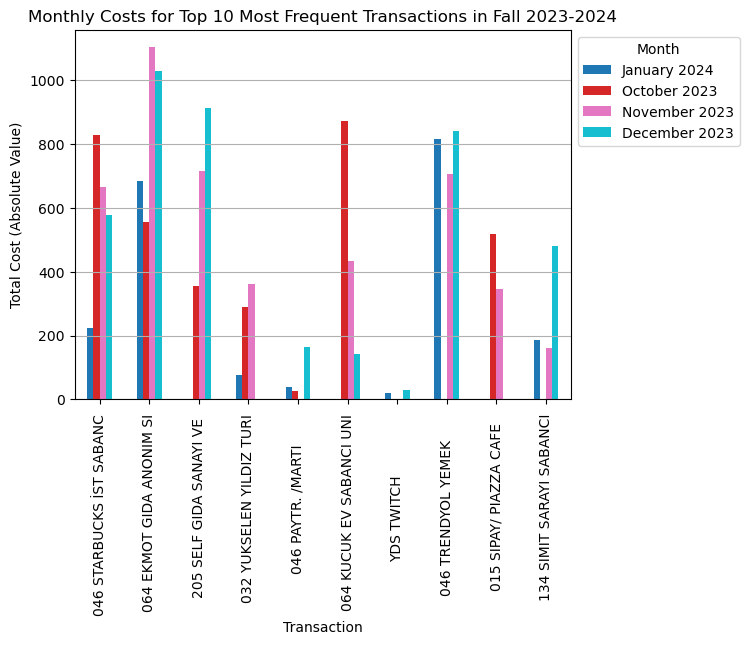

In [9]:

# Assuming df_copy is your DataFrame

# Filter data for Fall 2023-2024 semester
fall_data = df_copy[df_copy['Semester Name'] == 'Fall 2023-2024']

# Get the top 10 most frequent transactions
top_transactions = fall_data['Transaction '].value_counts().head(10).index

# Initialize a DataFrame to store the data
monthly_costs_df = pd.DataFrame(index=month_name[10:2], columns=top_transactions)

# Populate the DataFrame with monthly costs for each transaction
for transaction in top_transactions:
    # Filter data for the specific transaction
    transaction_data = fall_data[fall_data['Transaction '] == transaction]
    
    # Group by month and calculate total cost
    monthly_costs = transaction_data.groupby('month')['Cost'].sum().abs()
    
    # Update the DataFrame
    monthly_costs_df[transaction] = monthly_costs

# Transpose the DataFrame for a grouped bar chart
monthly_costs_df = monthly_costs_df.transpose()

# Extract the year from the copy dataset
year = df_copy['year'].unique()[0]

# Convert numeric values in legend to month names with the appropriate year
legend_labels = [f"{month_name[int(month)]} {year-1 if int(month) >= 10 else year}" for month in monthly_costs_df.columns]

# Plot the results using a grouped bar chart
plt.figure(figsize=(14, 8))
monthly_costs_df.plot(kind='bar', colormap='tab10')
plt.title('Monthly Costs for Top 10 Most Frequent Transactions in Fall 2023-2024')
plt.xlabel('Transaction')
plt.ylabel('Total Cost (Absolute Value)')
plt.legend(title='Month', labels=legend_labels, bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_copy is your DataFrame

# Convert 'Transaction Date' to datetime
df_copy['Transaction Date'] = pd.to_datetime(df_copy['Transaction Date'], format='%d.%m.%Y')

# Filter data until October 2, 2023
train_data = df_copy[df_copy['Transaction Date'] <= '2023-10-02']

# Calculate the frequencies of transactions
transaction_frequencies = train_data['Transaction '].value_counts()

# Separate features (X) and target variable (y)
X_train = pd.DataFrame({'Transaction ': transaction_frequencies.index, 'Frequency': transaction_frequencies.values})
y_train = pd.Series(transaction_frequencies.index)

# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train[['Frequency']], y_train)

# Predict the top 5 most frequent transactions in Fall 2023-2024
fall_data = df_copy[df_copy['Semester Name'] == 'Fall 2023-2024']
top_actual_transactions = fall_data['Transaction '].value_counts().head(5).index

# Create a DataFrame for prediction with frequencies
X_pred = pd.DataFrame({'Transaction': transaction_frequencies.index, 'Frequency': transaction_frequencies.values})

# Predict the top 5 most frequent transactions
top_predicted_transactions = model.predict(X_pred[['Frequency']])[:5]

# Display the comparison
print("Top 5 Most Frequent Transactions: Actual Transactions of Fall 2023-2024 and Model Predicted Transactions")

# Compare the actual and predicted transactions
comparison_result = pd.DataFrame({
    'Actual Transactions': top_actual_transactions,
    'Predicted Transactions': top_predicted_transactions,
})

display(comparison_result)


Top 5 Most Frequent Transactions: Actual Transactions of Fall 2023-2024 and Model Predicted Transactions


,Actual Transactions,Predicted Transactions
0,046 STARBUCKS İST SABANC,032 YUKSELEN YILDIZ TURI
1,064 EKMOT GIDA ANONIM SI,046 STARBUCKS İST SABANC
2,205 SELF GIDA SANAYI VE,064 EKMOT GIDA ANONIM SI
3,032 YUKSELEN YILDIZ TURI,067 KOPUKLU KAHVE
4,046 PAYTR. /MARTI,YDS TWITCH
